# Task 1

#### Create a Daily/weekly/monthly users Line chart.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vm_gz = "C:/Users/ericg/Desktop/video_model.csv.gz"
sm_gz = "C:/Users/ericg/Desktop/session_model.csv.gz"

In [3]:
df_sm = pd.read_csv(sm_gz, compression='gzip')
df_vm = pd.read_csv(vm_gz, compression='gzip')

In [4]:
df_sm_cleansed= df_sm.copy()
df_sm_cleansed['timestamp'] = pd.to_datetime(df_sm_cleansed['timestamp'])
df_sm_cleansed = df_sm_cleansed.set_index('timestamp')

In [5]:
daily_users = df_sm_cleansed['user_id'].resample('D').nunique()
weekly_users = df_sm_cleansed['user_id'].resample('W').nunique()
monthly_users = df_sm_cleansed['user_id'].resample('M').nunique()

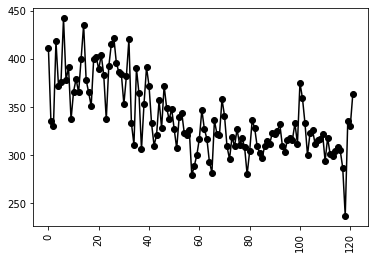

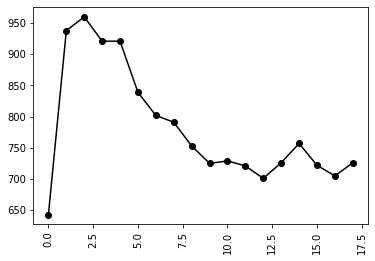

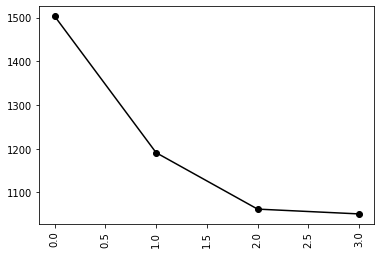

In [6]:
plt.plot(daily_users.values, 'ko-')
plt.xticks(rotation=90) 
plt.show() 
plt.plot(weekly_users.values, 'ko-') 
plt.xticks(rotation=90) 
plt.show()
plt.plot(monthly_users.values, 'ko-') 
plt.xticks(rotation=90) 
plt.show()

__Summary__: From all three charts above, we can tell that the volume of users climbed to its peak around mid of June, then started to declined until the mid of August and and stayed stable afterwards. Note that weekly trending and monthly trending are more stable than daily one. It is expected that there were more users during the weekends than weekdays, which would cause some noise in our daily trending.


# Task 2

#### What % of users generate a "Video Play" event daily/weekly/monthly?

Assumption: "Video Play" event in my calculation represents any user session that can find a match in video_model data. A match with zero will be considered as preview and counted as valid video engagement.

In [7]:
df_vm_cleansed= df_vm.copy()
df_vm_cleansed['timestamp'] = pd.to_datetime(df_vm_cleansed['timestamp'])
df_vm_cleansed = df_vm_cleansed.set_index('timestamp')
df_vm_cleansed['Entity'] = df_vm_cleansed['Entity'].map(lambda x: '{:.0f}'.format(x))   

df_join= pd.merge(df_sm, df_vm, how = 'inner', on =['user_id', 'device_id','session_uuid'])
df_join_cleansed = df_join.rename(columns={"timestamp_x": "sm_timestamp", "timestamp_y": "vm_timestamp"})
df_join_cleansed['sm_timestamp'] = pd.to_datetime(df_join_cleansed['sm_timestamp'])
df_join_cleansed['vm_timestamp'] = pd.to_datetime(df_join_cleansed['vm_timestamp'])
df_join_cleansed['Entity'] = df_join_cleansed['Entity'].map(lambda x: '{:.0f}'.format(x))   
df_join_cleansed = df_join_cleansed.set_index('sm_timestamp')

In [8]:
daily_users_engaged = df_join_cleansed['user_id'].resample('D').nunique()
weekly_users_engaged = df_join_cleansed['user_id'].resample('W').nunique()
monthly_users_engaged = df_join_cleansed['user_id'].resample('M').nunique()

daily_ptg_users_engaged = daily_users_engaged/daily_users
weekly_ptg_users_engaged = weekly_users_engaged/weekly_users
monthly_ptg_users_engaged = monthly_users_engaged/monthly_users

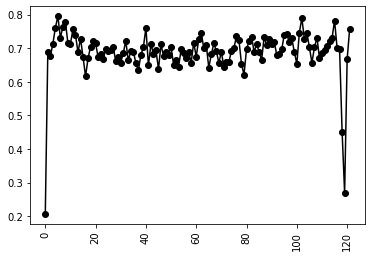

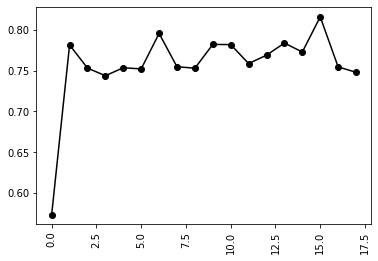

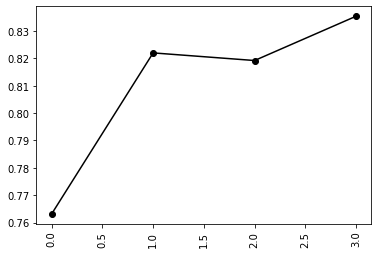

In [9]:
plt.plot(daily_ptg_users_engaged.values, 'ko-')
plt.xticks(rotation=90) 
plt.show() 
plt.plot(weekly_ptg_users_engaged.values, 'ko-') 
plt.xticks(rotation=90) 
plt.show()
plt.plot(monthly_ptg_users_engaged.values, 'ko-') 
plt.xticks(rotation=90) 
plt.show()

__Summary:__ It is observed that video engagment rate also increased starting from the mid of June in 2018.

# Task 3

#### What % of sessions involve a video play event that lasts longer than, say, 10 seconds?

In [10]:
thres = 10
mask = (df_join_cleansed['viewed_secs'] > thres)
total_sessions = df_sm_cleansed['session_uuid'].nunique()
sessions_longer_than_thres = np.int(df_join_cleansed.loc[mask,['session_uuid']].nunique())
print(sessions_longer_than_thres/total_sessions)

0.43622670551371556


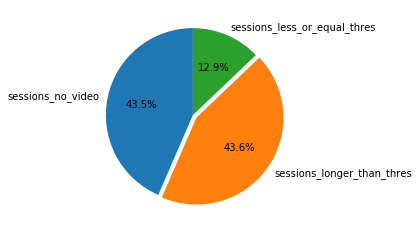

In [11]:
#pie chat for visualization
sessions_no_video = len(set(df_sm_cleansed['session_uuid'].unique())- set(df_join_cleansed['session_uuid'].unique()))
sessions_less_equal_thres = np.sum(df_join_cleansed.groupby('session_uuid')['viewed_secs'].max() <= thres)
labels = ['sessions_no_video',  'sessions_longer_than_thres', 'sessions_less_or_equal_thres']
sizes = [sessions_no_video, sessions_longer_than_thres, sessions_less_equal_thres]
explode = (0,0.05, 0)   
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [12]:
daily_total_sessions = df_sm_cleansed['session_uuid'].resample('D').nunique()
weekly_total_sessions = df_sm_cleansed['session_uuid'].resample('W').nunique()
monthly_total_sessions = df_sm_cleansed['session_uuid'].resample('M').nunique()

mask = (df_join_cleansed['viewed_secs'] > thres)
sessions_longer_than_thres =df_join_cleansed.loc[mask,:]
daily_sessions_longer_than_thres = sessions_longer_than_thres['session_uuid'].resample('D').nunique()
weekly_sessions_longer_than_thres = sessions_longer_than_thres['session_uuid'].resample('W').nunique()
monthly_sessions_longer_than_thres = sessions_longer_than_thres['session_uuid'].resample('M').nunique()

daily_ptg_session = daily_sessions_longer_than_thres/daily_total_sessions
weekly_ptg_session = weekly_sessions_longer_than_thres/weekly_total_sessions
monthly_ptg_session = monthly_sessions_longer_than_thres/monthly_total_sessions

In [13]:
print(monthly_ptg_session)

sm_timestamp
2018-06-30 00:00:00+00:00    0.402032
2018-07-31 00:00:00+00:00    0.426066
2018-08-31 00:00:00+00:00    0.453549
2018-09-30 00:00:00+00:00    0.470119
Freq: M, Name: session_uuid, dtype: float64


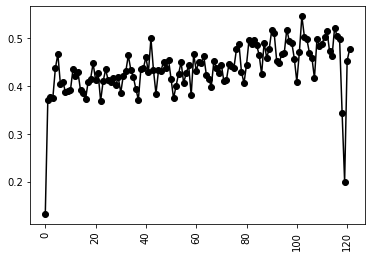

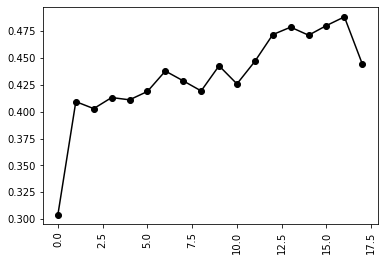

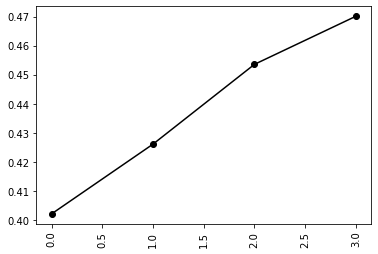

In [14]:
plt.plot(daily_ptg_session.values, 'ko-')
plt.xticks(rotation=90) 
plt.show() 
plt.plot(weekly_ptg_session.values, 'ko-') 
plt.xticks(rotation=90) 
plt.show()
plt.plot(monthly_ptg_session.values, 'ko-') 
plt.xticks(rotation=90) 
plt.show()

__Summary:__ Overall speaking, the % of sessions involve a video play event that lasts longer than 10 seconds is around __43.6%__. From June to September in 2018, the % of sessions constantly increased from monthly average of 40% to 47%.

# Task 4 - Open Ended Investigation

There are many things that I want to do with given data sets to further understand customer engagements. Specifically,  
- 4-1. How long on average did each user spend on the video app per day/week/month?  
- 4-2. How many videos on average did each user play per day/week/month?
- 4-3 How often does user complete each video?
- 4-4 What are the major device platforms?
- 4-5 What are the major video types that users trend to engage?
- 4-6 What are the most popular contents? And most watched videos?
- 4-7 What other factors would correlate to the time spent on video app?
- 4-8 What conclusions can be drawed from given datasets?
- 4-9 What could be the next steps to further optimize customer engagements?

### 4.1 How long on average did each user spend on the video app per day/week/month?

In [15]:
daily_viewed_secs = df_join_cleansed['viewed_secs'].resample('D').sum()
weekly_viewed_secs = df_join_cleansed['viewed_secs'].resample('W').sum()
monthly_viewed_secs = df_join_cleansed['viewed_secs'].resample('M').sum()

daily_users_engaged = df_join_cleansed['user_id'].resample('D').nunique()
weekly_users_engaged = df_join_cleansed['user_id'].resample('W').nunique()
monthly_users_engaged = df_join_cleansed['user_id'].resample('M').nunique()

daily_viewed_secs_per_user = daily_viewed_secs/daily_users_engaged
weekly_viewed_secs_per_user = weekly_viewed_secs/weekly_users_engaged
monthly_viewed_secs_per_user = monthly_viewed_secs/monthly_users_engaged
 
print(daily_viewed_secs_per_user.mean()/60) 
print(daily_viewed_secs_per_user.mean()/60/60) 
print(daily_viewed_secs_per_user.mean()/60/60/24) 

69.40851274500768
1.156808545750128
0.048200356072922


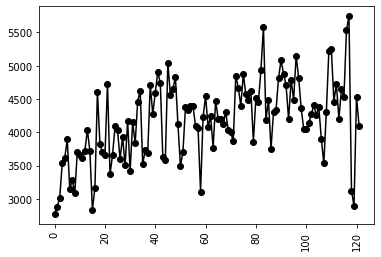

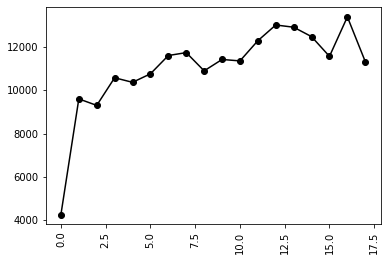

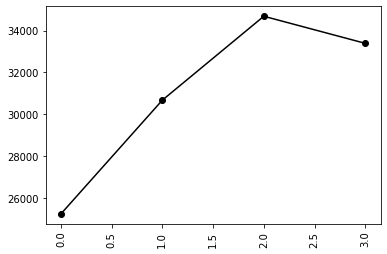

In [16]:
plt.plot(daily_viewed_secs_per_user.values, 'ko-')
plt.xticks(rotation=90) 
plt.show() 
plt.plot(weekly_viewed_secs_per_user.values, 'ko-')
plt.xticks(rotation=90) 
plt.show()
plt.plot(monthly_viewed_secs_per_user.values, 'ko-') 
plt.xticks(rotation=90) 
plt.show()

__Summary:__ The average time that each user spent video jumped around mid of June and then steadily increased until the beginning of September. On average, each user spent 69 minues per day per video. 

## 4.2 How many videos on average did each user play per day/week/month?

In [17]:
daily_viewed_video = df_join_cleansed['Entity'].resample('D').count()
weekly_viewed_video = df_join_cleansed['Entity'].resample('W').count()
monthly_viewed_video = df_join_cleansed['Entity'].resample('M').count()

daily_viewed_video_per_user = daily_viewed_video/daily_users_engaged
weekly_viewed_video_per_user = weekly_viewed_video/weekly_users_engaged
monthly_viewed_video_per_user = monthly_viewed_video/monthly_users_engaged

print(daily_viewed_video_per_user.mean())

5.807973039196764


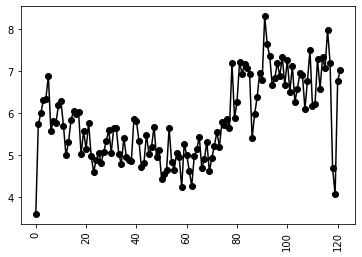

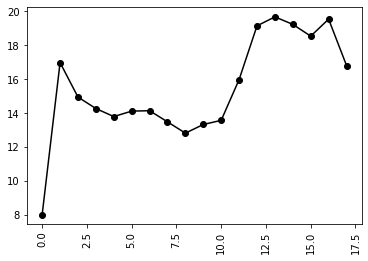

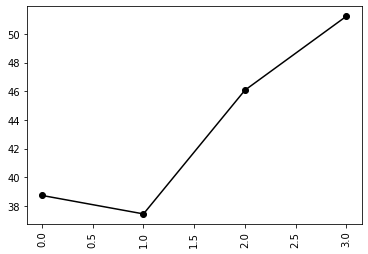

In [18]:
plt.plot(daily_viewed_video_per_user.values, 'ko-')
plt.xticks(rotation=90) 
plt.show() 
plt.plot(weekly_viewed_video_per_user.values, 'ko-')
plt.xticks(rotation=90) 
plt.show()
plt.plot(monthly_viewed_video_per_user.values, 'ko-') 
plt.xticks(rotation=90) 
plt.show()

__Summary:__ On average, each user engaged 6 videos per day.

### 4-3 How often do users complete playing video each time?

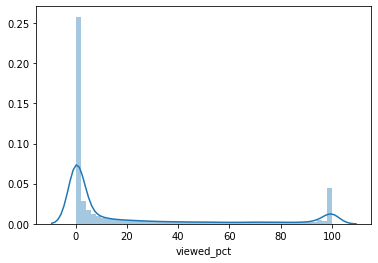

In [19]:
sns.distplot(df_join_cleansed['viewed_pct'])
plt.show()

(-1, 0]      76561
(0, 95]      73304
(95, 100]    16280
Name: viewed_pct_bucket, dtype: int64 (-1, 0]      0.460808
(0, 95]      0.441205
(95, 100]    0.097987
Name: viewed_pct_bucket, dtype: float64


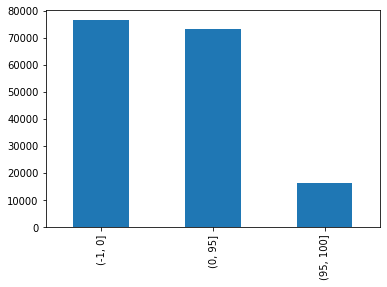

In [20]:
bins = [-1, 0, 95, 100]
df_join_cleansed['viewed_pct_bucket'] = pd.cut(df_join_cleansed['viewed_pct'], bins)
out = df_join_cleansed['viewed_pct_bucket'].value_counts()
out_norm = df_join_cleansed['viewed_pct_bucket'].value_counts(normalize=True)
print(out,out_norm)
out.plot.bar()
plt.show()

__Summary:__ About 46% engagments were "previews" (i.e. video event without any view_secs). Around 44% had stoped watching before video ended. 

### 4-4 What are the major device platforms?

[449, 308, 918]


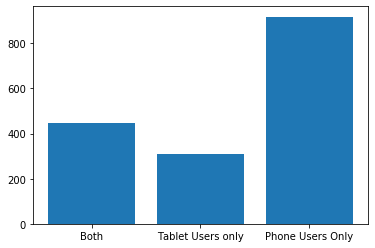

[371, 290, 720]


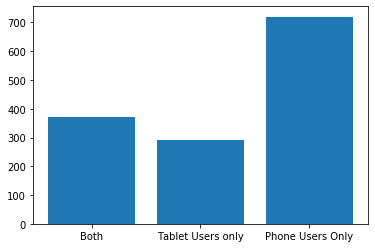

In [21]:
iPhone_iPod_mask = df_sm_cleansed['device_type'].str.contains('iPhone') | df_sm_cleansed['device_type'].str.contains('iPod')
iPad_mask = df_sm_cleansed['device_type'].str.contains('iPad')
iPhone_iPod_users = set( df_sm_cleansed.loc[iPhone_iPod_mask,'user_id'])
iPad_users = set( df_sm_cleansed.loc[iPad_mask,'user_id'])
Both = iPad_users.intersection(iPhone_iPod_users)
iPadOnly = iPad_users.difference(iPhone_iPod_users)
iPhoneiPadOnly = iPhone_iPod_users.difference(iPad_users)

iPhone_iPod_engaged_mask = df_join_cleansed['device_type'].str.contains('iPhone') | df_join_cleansed['device_type'].str.contains('iPod')
iPad_engaged_mask = df_join_cleansed['device_type'].str.contains('iPad')
iPhone_iPod_engaged_users = set( df_join_cleansed.loc[iPhone_iPod_engaged_mask,'user_id'])
iPad_engaged_users = set( df_join_cleansed.loc[iPad_engaged_mask,'user_id'])
Both_engaged = iPad_engaged_users.intersection(iPhone_iPod_engaged_users)
iPadEngagedOnly = iPad_engaged_users.difference(iPhone_iPod_engaged_users)
iPhoneEngagediPadOnly = iPhone_iPod_engaged_users.difference(iPad_engaged_users)

x_ax = ['Both', 'Tablet Users only', 'Phone Users Only']
platform_user = [len(Both), len(iPadOnly), len(iPhoneiPadOnly)]
print(platform_user)
plt.bar(height=platform_user,x = x_ax)
plt.show()
 
platform_engaged_user = [len(Both_engaged), len(iPadEngagedOnly), len(iPhoneEngagediPadOnly)]
print(platform_engaged_user)
plt.bar(height=platform_engaged_user,x = x_ax)
plt.show()

__Summary:__ One of my hypothesis is that users who only use either tablet or iPhone might engage more with videos. By comparing those two distributions above, it appears no difference in users distribution across user types. The device might not be a key factor when it comes to user engagments even though there are more phone users than tablet users.

### 4-5 What are the major video types that users trend to engage?

type
Rental           70
Purchase        306
DVR           16014
On-Demand     39289
Live         110466
Name: Entity, dtype: int64


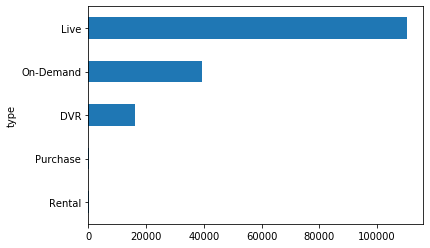

In [22]:
video_type = df_join_cleansed.groupby('type')['Entity'].count()
video_type = video_type.sort_values(ascending=True)
print(video_type)
video_type.plot.barh()
plt.show()

Summary: The top video type is Live, followed by On-Demand and DVR.

### 4-6 What are the most popular contents? And most watched videos?


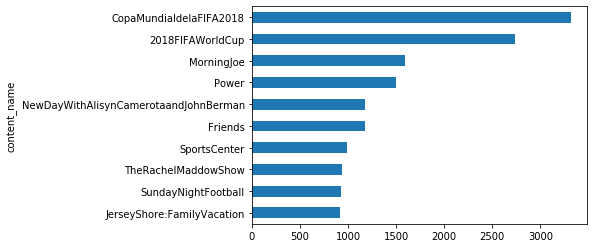

In [23]:
video_content_top10 = df_join_cleansed.groupby('content_name')['Entity'].count().sort_values(ascending=False)[:10]
video_content_top10 = video_content_top10.sort_values(ascending=True)
video_content_top10.plot.barh()
plt.show()

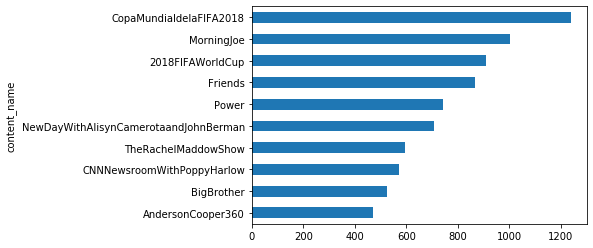

In [24]:
df_join_cleansed_watched = df_join_cleansed[df_join_cleansed['viewed_secs']> 10]
video_content_watched_top10 = df_join_cleansed_watched.groupby('content_name')['Entity'].count().sort_values(ascending=False)[:10]
video_content_watched_top10 = video_content_watched_top10.sort_values(ascending=True)
video_content_watched_top10.plot.barh()
plt.show()

__Summary:__ It appears football game, especially world cup in 2018 had great impact on video users during the given time period. It is the most popular video that video users tend to watch. Unsurprisly, it also explains the trending as we saw previous because world cup started in mid of June 2018 and lasted for a month. Besides world cup, the tv show Friends tended to capture more users who watches video longer than 10 seconds.

### 4-7 What factors correlates to time spent on the video app?

In [25]:
cols = ['viewed_secs', 'device_type','pages_viewed', 'duration_secs', 'content_name','season', 'episode', 'type']
df_join_cleansed_watched = df_join_cleansed.loc[:,cols]

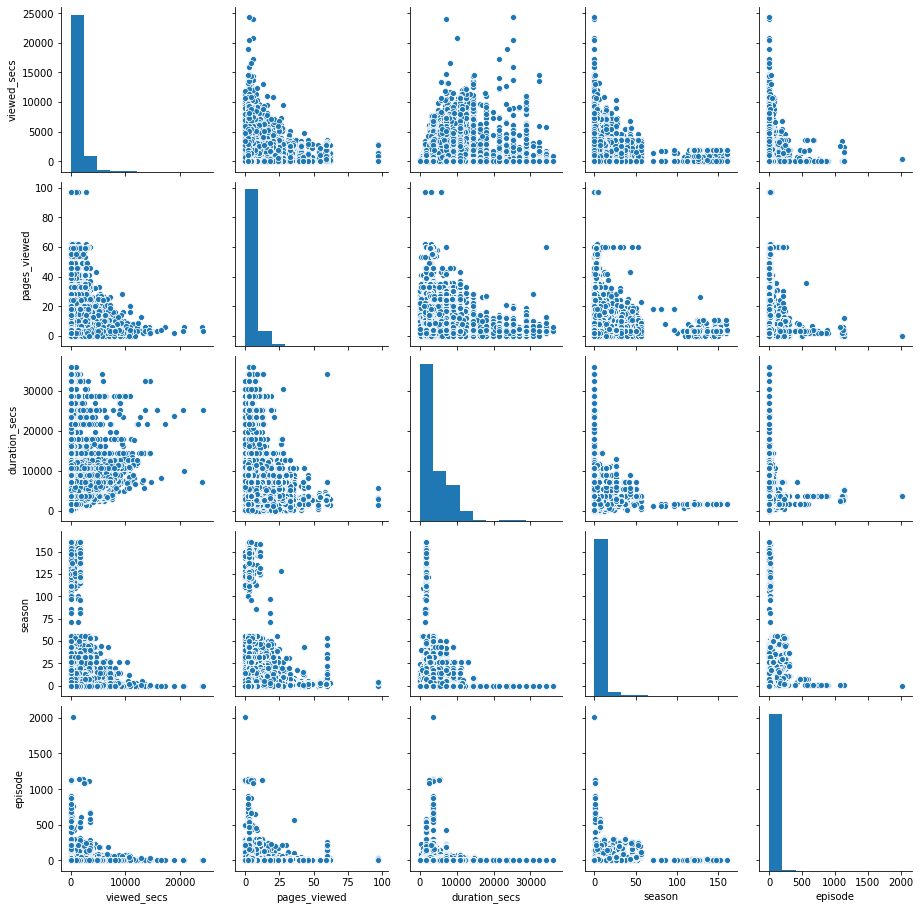

In [26]:
sns.pairplot(df_join_cleansed_watched)
plt.show()

__Summary:__ From previous charts and analysis, we can tell that seasonality, sports event and video contents will have great impact on user engagements. I would also be interested to check for correlations for other attributes such as video length, pages viewed, season and episode. By plotting correlation matrix, we can see features such as season and episode could also be promising factors that drive total time spent on videos.

### 4-8 What conclusions can be drawed from given datasets?

From prvious analysis, we can tell that both user volumes and user engagements jumped in the middle of June and became steadable till the end of August in 2018. After digging into given datasets, we can draw conclusion that work cup in 2018 was one of major factors that affect user engagements. Besides world sport events, we also noticed that seasonality, video content, season and espisode are also potental factors. Those can be great features for future machine learning.



### 4-9 What could be the next steps to further optimize customer engagements?

We could further set up a few hypothesis or A/B testings to optimize user engagement. For example, what difference will it make if we can alter video description style or length of previews especially for those who played video less than 10 seconds? Will notifications make a difference in user engagements? And how much difference?

In addition to looking into customers engagement, it would be also interesting to "tie" customer engagement with company revenue. In this way, we could further quantify how customer engagmement affect total profit.
